In [1]:
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
re_constellation = re.compile(r'location_revisit_connection_round_dict_(.*)_')

In [3]:
# set figure folder
figure_folder = 'figures'
os.makedirs(figure_folder, exist_ok=True)

In [4]:
# load data
location_revisit_connection_round_dict_file_list = os.listdir('.')
location_revisit_connection_round_dict_file_list = [file for file in location_revisit_connection_round_dict_file_list if file.endswith('.json') and 'location_revisit_connection_round_dict' in file]

In [5]:
constellation_location_revisit_connection_round_dict = {} # {constellation: {location: {revisit: {connection: round}}}}
for file in location_revisit_connection_round_dict_file_list:
    with open(file, 'r') as f:
        location_revisit_connection_round_dict = json.load(f)
    constellation = re_constellation.match(file).group(1)
    constellation_location_revisit_connection_round_dict[constellation] = location_revisit_connection_round_dict
    print("constellation: {}, location count: {}".format(constellation, len(location_revisit_connection_round_dict)))

constellation: starlink_550_first, location count: 53
constellation: sentinel, location count: 39


In [6]:
plt_config = {
    'sentinel': {'color': '#1240AB', 'linestyle': '-', 'marker': 'o', 'label': 'Sentinel-2'},
    'starlink_550_first': {'color': '#7109AA', 'linestyle': '--', 'marker': 's', 'label': 'Starlink'},
}

/tmp/ipykernel_3482852/3629735679.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


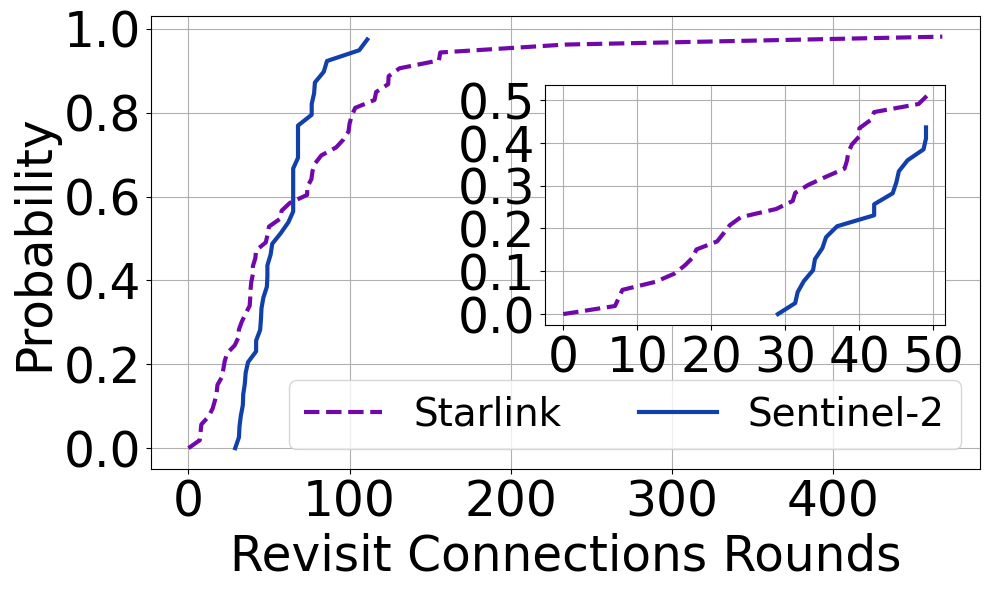

In [7]:
# plot a CDF figure
# the x-axis is the number of connections
# the y-axis is the CDF of the locations with the number of connections less than the x-axis

fig = plt.figure(figsize=(10, 6))
font_size = 35
line_width = 3

for constellation, location_revisit_connection_round_dict in constellation_location_revisit_connection_round_dict.items():
    connection_round_list = []
    for location, revisit_connection_round_info in location_revisit_connection_round_dict.items():
        connection_round_list.append(revisit_connection_round_info['average']) 
    connection_round_list = np.array(connection_round_list)
    connection_round_list = np.sort(connection_round_list)
    y = np.arange(len(connection_round_list)) / len(connection_round_list)
    label_name = plt_config[constellation]['label']
    color = plt_config[constellation]['color']
    linestyle = plt_config[constellation]['linestyle']
    marker = plt_config[constellation]['marker']
    if 'sentinel' in constellation:
        label_name = 'Sentinel-2'
    elif 'starlink' in constellation:
        label_name = 'Starlink'
    plt.plot(connection_round_list, y, label=label_name, linewidth=line_width, color=color, linestyle=linestyle)

plt.xlabel('Revisit Connections Rounds', fontsize=font_size)
plt.ylabel('Probability', fontsize=font_size)
plt.legend(fontsize=font_size * 0.8, loc='lower right', bbox_to_anchor=(1.0, 0.0), ncol=2)
plt.grid(True)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
# plot a small figure inside the figure
# for the number of connections less than 5
# the x-axis is the number of connections
# the y-axis is the CDF of the locations with the number of connections less than the x-axis
small_figure = fig.add_axes([0.55, 0.45, 0.4, 0.4])
for constellation, location_revisit_connection_round_dict in constellation_location_revisit_connection_round_dict.items():
    connection_round_list = []
    for location, revisit_connection_round_info in location_revisit_connection_round_dict.items():
        connection_round_list.append(revisit_connection_round_info['average']) 
    connection_round_list = np.array(connection_round_list)
    connection_round_list = np.sort(connection_round_list)
    y = np.arange(len(connection_round_list)) / len(connection_round_list)
    label_name = plt_config[constellation]['label']
    if 'sentinel' in constellation:
        label_name = 'Sentinel-2'
    elif 'starlink' in constellation:
        label_name = 'Starlink'
    color = plt_config[constellation]['color']
    linestyle = plt_config[constellation]['linestyle']
    marker = plt_config[constellation]['marker']
    small_figure.plot(connection_round_list[connection_round_list < 50], y[connection_round_list <50], label=label_name, color=color, linestyle=linestyle, linewidth=line_width)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{figure_folder}/fig1b_connection_round_cdf.pdf')
plt.savefig(f'{figure_folder}/fig1b_connection_round_cdf.png')
